In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
mnist = np.load('Mnist_M.npy')

In [3]:
def random_bat(data_x):
    num_images = len(data_x)
    idx = np.random.choice(num_images, size= batch_size, replace=False)
    x_batch = data_x[idx, :]
    return x_batch

In [11]:
batch_size = 200
bacth_times = len(mnist[0][0])// batch_size
mnist_train = mnist[0][0]
mnist_test = mnist[2][0]
epoches = 15
lr = 0.001
#x = tf.placeholder(tf.float32, shape = [None, 28, 28, 3])

In [5]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding = 'SAME')

def deconv2d(x, W, output_shape):
    return tf.nn.conv2d_transpose(x, W, output_shape, strides = [1, 2, 2, 1], padding = 'SAME')

In [6]:
def lrelu(x, leak=0.2, name="lrelu"):
    f1 = 0.5 * (1 + leak)
    f2 = 0.5 * (1 - leak)
    return f1 * x + f2 * abs(x)

In [7]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape = [None, 28, 28, 3])

W_e_conv1 = tf.Variable(tf.truncated_normal([3, 3, 3, 32] ,stddev = 0.1))
b_e_conv1 = tf.Variable( tf.constant(0.1, shape= [32]))
h_e_conv1 = lrelu(tf.add(conv2d(x, W_e_conv1), b_e_conv1))

code_layer = h_e_conv1

W_d_conv2 = tf.Variable(tf.truncated_normal([3, 3, 3, 32] ,stddev = 0.1))
b_d_conv2 = tf.Variable( tf.constant(0.1, shape= [16]))
output_shape_d_conv2 = tf.stack([tf.shape(x)[0], 28, 28, 3])
h_d_conv2 = lrelu(deconv2d(code_layer, W_d_conv2, output_shape_d_conv2))

x_reconstruct = h_d_conv2

In [9]:
cost = tf.reduce_mean(tf.pow(x_reconstruct - x, 2))
optimizer = tf.train.AdamOptimizer(lr).minimize(cost)

In [12]:
sess = tf.InteractiveSession()
init_op = tf.global_variables_initializer()
sess.run(init_op)

loss_list = []
test_loss = []
for epoch in range(epoches):
    for num in range(bacth_times):
        batch = random_bat(mnist_train)
        _, costs = sess.run([optimizer, cost], feed_dict={x:batch})
        optimizer.run(feed_dict={x: batch})    
    print("step %d, loss %g"%(epoch, costs))
    loss_list.append(costs)
        
print("final testing loss %g" % cost.eval(feed_dict={x: mnist_test}))

step 0, loss 156.408
step 1, loss 51.6768
step 2, loss 32.3026
step 3, loss 21.8416
step 4, loss 13.7002
step 5, loss 11.2099
step 6, loss 7.47516
step 7, loss 4.47151
step 8, loss 3.92214
step 9, loss 3.60927
step 10, loss 2.23775
step 11, loss 1.99996
step 12, loss 1.41771
step 13, loss 1.13036
step 14, loss 1.12013
final testing loss 1.00898


# (a) Show the reconstruction loss in your report

## Method: 
### encode & decode : Use one hidden layer for convolution and deconvolution
### activations: LeakReLU, hope to solve dying ReLU
### optimizer : Adam

<img src="./1.jpg" alt="Drawing" style="width: 600px;"/>

## AutoEnocder: 

"Autoencoder" is a data compression algorithm where the compression and decompression functions. It is a way for unsupervised learning to extract features.

The specifics for autoencoder are the follows:

1) Autoencoders will be able to compress data similar to what they have been trained on. 

2) Autoencoders can decompressed outputs will be degraded compared to the original inputs.

3) Autoencoders are learned automatically from data examples. It means it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

<img src="./2.jpg" alt="Drawing" style="width: 900px;"/>

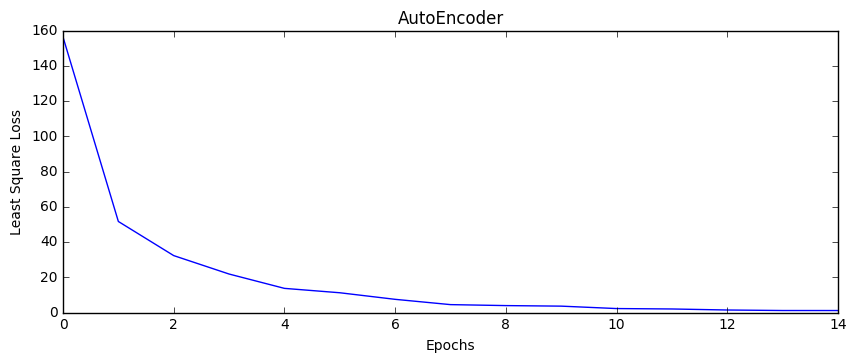

In [17]:

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.subplot(2, 1, 2)
plt.plot(loss_list)
plt.title('AutoEncoder')
plt.xlabel('Epochs')
plt.ylabel("Least Square Loss")
plt.show()

In [13]:
def plot_img(ori_list, n = 10):

    plt.figure(figsize=(2 * 10, 4))

    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(ori_list[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        pic = sess.run(x_reconstruct, {x:np.expand_dims(ori_list[i], axis=0)})

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(pic[0].astype('uint8'))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    plt.show()

# (b) Plot 10 random samples of reconstruction image of test data and original image together

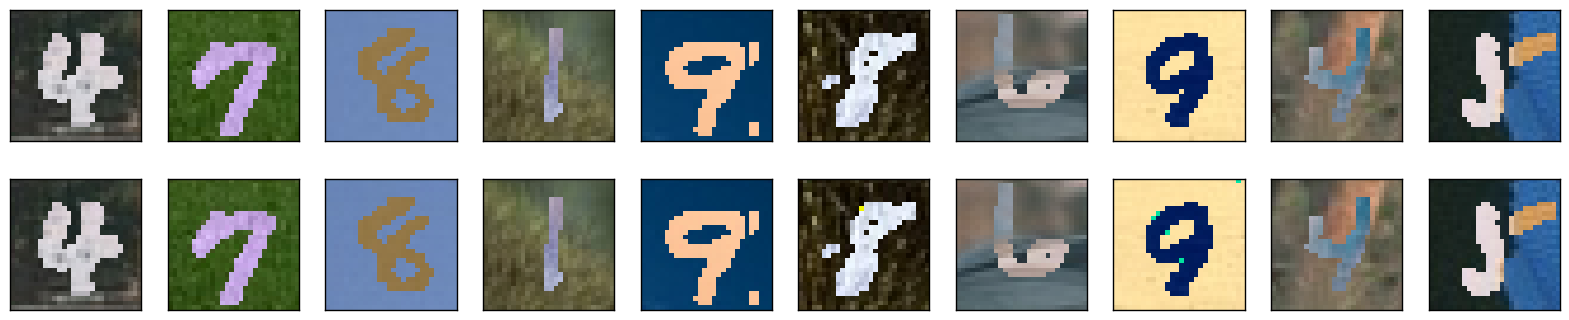

In [21]:
# random
np.random.seed()
idx = np.random.choice(len(mnist_test), size= 10, replace=False)

ori_list = []
for i in mnist_test[idx]:
    ori_list.append(i)
plot_img(ori_list)

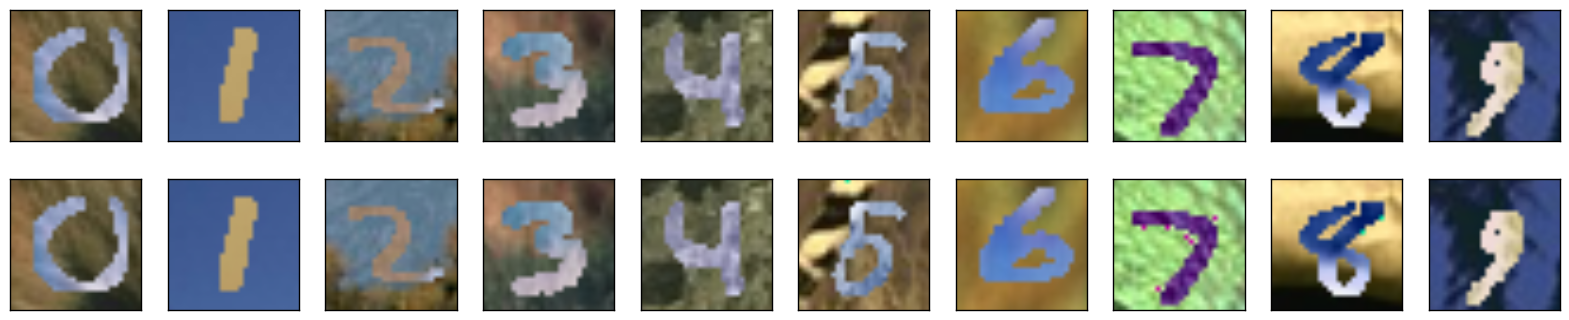

In [15]:
ori_list = []
ori_list.append(mnist_test[380]) #0
ori_list.append(mnist_test[8100]) # 1
ori_list.append(mnist_test[2500]) # 2
ori_list.append(mnist_test[500]) # 3
ori_list.append(mnist_test[3500]) # 4
ori_list.append(mnist_test[45]) # 5
ori_list.append(mnist_test[8200]) # 6
ori_list.append(mnist_test[17]) # 7
ori_list.append(mnist_test[84]) # 8
ori_list.append(mnist_test[1000]) # 9
plot_img(ori_list)